In [4]:
import time
import sys
import math
import numpy as np
import gym
sys.path.append('../../duckietown-sim/')
from gym_duckietown.simulator import Simulator as DuckietownEnv
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('timestep')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

### Initialize Enviroment

In [2]:
env = DuckietownEnv(
    map_name ='PID_demo', 
    domain_rand = False,
    actions_as_voltages=True,
    init_angle=0
)

obs = env.reset()
env.render(top_down=True)

### Determine Task

In [4]:
# Get to waypoint at x=3.25m
goal = 3.25

def read_sensor():
    return env.cur_pos[0]

In [12]:
# Get to 0.75m/s
goal = 0.75

def read_sensor():
    return env.speed

### Run Control Loop

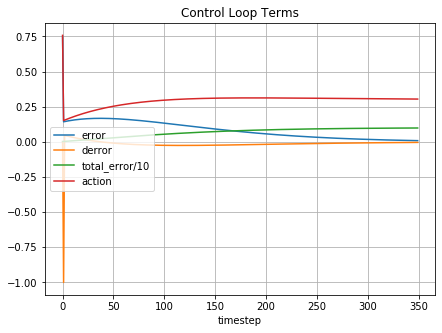

In [15]:
obs = env.reset()
last_error = goal - read_sensor()
total_error = 0
dt = 1/30

logs = collections.defaultdict(list)
for t in range(350):
    state = read_sensor()

    error = goal - state
    derror = (error - last_error)/dt
    total_error += error * dt
    
    derror = max(min(derror, 1), -1)
    
    kp = 1
    kd = 0
    ki = 0.3
    action = kp * error + kd * derror + ki * total_error

    last_error = error
    
    env.step([action, action])
    env.render(top_down=True)

    logs['error'].append(error)
    logs['derror'].append(derror)
    logs['total_error/10'].append(total_error/10)
    logs['action'].append(action)
    live_plot(logs, title='Control Loop Terms')

_

_

_

_

_

_

_

_

_

_

_

_

_

_

_








In [23]:
#Bang-Bang

obs = env.reset()

logs = collections.defaultdict(list)
for t in range(350):
    state = read_sensor()
    
    if state < goal:
        action = 1
    elif state > goal:
        action = -1
    else:
        action = 1

    obs, reward, done, info = env.step([action, action])
    env.render(top_down=True)

    logs['action'].append(action)
    logs['goal'].append(goal)
    logs['state'].append(state)
    live_plot(logs, title='Control Loop Terms')

In [ ]:
# Get to waypoint at x=3.25m
goal = 3.25

def read_sensor():
    return env.cur_pos[0]

In [ ]:
#PID Position
kp, kd, ki= 1, 1.4, 0

#PID Vel
kp, kd, ki= 1, 0.03, 0.3


obs = env.reset()
last_error = goal - read_sensor()
total_error = 0

logs = collections.defaultdict(list)
for t in range(350):
    state = read_sensor()

    error = goal - state
    derror = (error - last_error)/env.delta_time
    
    derror = max(min(derror, 2), -2)
    
    action = kp * error + kd * derror + ki * total_error

    last_error = error
    total_error += error * env.delta_time
    
    env.step([action, action])
    env.render(top_down=True)

    logs['action'].append(action)
    logs['error'].append(error)
    logs['derror'].append(derror)
    logs['total error/10'].append(total_error/10)
    live_plot(logs, title='Control Loop Terms')

In [21]:
# Maintain a constant speed of 0.75m/s
goal = 0.75

def read_sensor():
    return env.speed